In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt

# Lectura de la base de datos 

In [6]:
df = pd.read_csv('adultosf.csv')
df

,estrato,region_cv,est_sel,ENTIDAD,MUNICIPIO,LOCALIDAD,RESULTADO_1,RESULTADO_2,RESULTADO_3,RESULTADO_4,...,TIEMPO,HORA_FIN,FECHA_FIN,COMPLETA,OTROENT,ADUL_COMP,ponde_g,rural_20,ponde_g20,area_20
0,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,19:25:43,12/10/2020,1,,1,10864.652430,3,14033.814540,2
1,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,14:28:48,12/10/2020,1,,1,10864.652430,3,14033.814540,2
2,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,17:49:35,13/10/2020,1,,1,10864.652430,3,14033.814540,2
3,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,12:19:53,12/10/2020,1,,1,10380.623150,3,9574.774416,2
4,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,6,11:49:40,12/10/2020,1,,1,10455.582230,3,9643.914413,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,4,13:14:17,24/10/2020,1,,1,6281.261595,3,8113.472651,2
8591,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,3,12:05:09,23/10/2020,1,,1,12002.852370,3,11071.069820,2
8592,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,3,12:53:15,23/10/2020,1,,1,12890.885940,3,16121.631790,2
8593,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,5,14:35:38,24/10/2020,1,,1,18843.784790,3,24340.417950,2


## 1 ) Descripcion del Dataset: 
 La información proviene de entrevistas realizadas durante el confinamiento por COVID-19 en México, en estas entrevistas se buscaba analizar el efecto que tuvo este confinamiento en violencia y censar la posibilidad de que las personas se aplicaran la vacuna del covid una vez que estuviera disponible. 
 Es de interés conocer: 
* ¿Que grupos de edades tienen más posibilidades de aceptar o no la nueva vacuna contra covid-19?
* ¿Hay algun género que muestre una tendencia a aceptar la vacuna? 
 

In [7]:
df.columns

Index(['estrato', 'region_cv', 'est_sel', 'ENTIDAD', 'MUNICIPIO', 'LOCALIDAD',
       'RESULTADO_1', 'RESULTADO_2', 'RESULTADO_3', 'RESULTADO_4',
       'ACEPTO ENTREVISTA', 'ADUL', 'GENERO', 'EDAD', 'NOTA04', 'VINFLUENZA',
       'VCOVID', 'FUMADOR', 'ALCOHOL', 'NOTA06', 'AGRESION', 'SUICIDIO',
       'VIOLENCIAH', 'INCREMENTOV', 'ADUL301B', 'ADUL302B', 'ADUL301C',
       'ADUL302C', 'ADUL301D', 'ADUL302D', 'COMENTARIO', 'TIEMPO', 'HORA_FIN',
       'FECHA_FIN', 'COMPLETA', 'OTROENT', 'ADUL_COMP', 'ponde_g', 'rural_20',
       'ponde_g20', 'area_20'],
      dtype='object')

In [8]:
df.drop(['estrato', 'region_cv','est_sel',  'NOTA04', 'NOTA06',  'RESULTADO_1', 'RESULTADO_2' ,'RESULTADO_3','RESULTADO_4'],
        axis = 1,
        inplace = True)
df.head()

,ENTIDAD,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,...,TIEMPO,HORA_FIN,FECHA_FIN,COMPLETA,OTROENT,ADUL_COMP,ponde_g,rural_20,ponde_g20,area_20
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,...,3,19:25:43,12/10/2020,1,,1,10864.65243,3,14033.814540,2
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,...,3,14:28:48,12/10/2020,1,,1,10864.65243,3,14033.814540,2
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,...,3,17:49:35,13/10/2020,1,,1,10864.65243,3,14033.814540,2
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,...,3,12:19:53,12/10/2020,1,,1,10380.62315,3,9574.774416,2
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,...,6,11:49:40,12/10/2020,1,,1,10455.58223,3,9643.914413,2


In [9]:
df.columns

Index(['ENTIDAD', 'MUNICIPIO', 'LOCALIDAD', 'ACEPTO ENTREVISTA', 'ADUL',
       'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID', 'FUMADOR', 'ALCOHOL',
       'AGRESION', 'SUICIDIO', 'VIOLENCIAH', 'INCREMENTOV', 'ADUL301B',
       'ADUL302B', 'ADUL301C', 'ADUL302C', 'ADUL301D', 'ADUL302D',
       'COMENTARIO', 'TIEMPO', 'HORA_FIN', 'FECHA_FIN', 'COMPLETA', 'OTROENT',
       'ADUL_COMP', 'ponde_g', 'rural_20', 'ponde_g20', 'area_20'],
      dtype='object')

In [10]:
df.drop(['ADUL301B', 'ADUL302B','ADUL301C', 'ADUL302C', 'ADUL301D',  'ADUL302D', 'COMENTARIO' ,'TIEMPO','HORA_FIN','FECHA_FIN', 'COMPLETA', 'OTROENT',
       'ADUL_COMP', 'ponde_g', 'rural_20', 'ponde_g20', 'area_20' ],
        axis = 1,
        inplace = True)
df.columns

Index(['ENTIDAD', 'MUNICIPIO', 'LOCALIDAD', 'ACEPTO ENTREVISTA', 'ADUL',
       'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID', 'FUMADOR', 'ALCOHOL',
       'AGRESION', 'SUICIDIO', 'VIOLENCIAH', 'INCREMENTOV'],
      dtype='object')

In [11]:
df.dtypes

ENTIDAD              object
MUNICIPIO            object
LOCALIDAD            object
ACEPTO ENTREVISTA     int64
ADUL                  int64
GENERO                int64
EDAD                  int64
VINFLUENZA            int64
VCOVID                int64
FUMADOR               int64
ALCOHOL               int64
AGRESION              int64
SUICIDIO              int64
VIOLENCIAH           object
INCREMENTOV          object
dtype: object

## Variables de Interés:
* ENTIDAD = Estado donde se realizo la entrevista,
* GENERO
* EDAD 
* VINFLUENZA = ¿Tienen la vacuna de la influenza? , 
* VCOVID = ¿Se pondrían la vacuna del covid?, 
* FUMADOR = Consumidor de tabaco, 
* ALCOHOL= consumidor de alcohol, 
* AGRESION = Ha sufrido agresiones durante la cuarentena?,
* SUICIDIO = Ha pensado en el suicido?, 
* VIOLENCIA H = Se ha incrementado la violencia en el hogar por la cuarentena?

In [12]:
def categorizar(x): #en esta parte definimos la funcion que se categorizará
    if(0<= x <=19): # estas son las categorías
        return '<20'
    elif(20<= x <=29):
        return '20 - 29'
    elif(30<= x <= 39):
        return '30 - 39'
    else:
        return '>=40'

df['GRUPOE'] = df.apply(
        lambda tbl: categorizar(tbl['EDAD']), #En este punto estamos agregando la columna ageGP y le decimos que utilice la funcion categorizar
        axis = 1 )

In [13]:
df.head(5)

,ENTIDAD,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,4,2,5,2,,>=40
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,5,2,5,2,,>=40
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,5,2,5,2,,>=40
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,5,2,5,,,>=40
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,3,2,5,,,>=40


In [14]:
df.VCOVID.unique()

array([2, 1, 9])

In [15]:
df.dtypes

ENTIDAD              object
MUNICIPIO            object
LOCALIDAD            object
ACEPTO ENTREVISTA     int64
ADUL                  int64
GENERO                int64
EDAD                  int64
VINFLUENZA            int64
VCOVID                int64
FUMADOR               int64
ALCOHOL               int64
AGRESION              int64
SUICIDIO              int64
VIOLENCIAH           object
INCREMENTOV          object
GRUPOE               object
dtype: object

In [16]:
df.set_index('ENTIDAD', inplace=True)

In [17]:
df.head(5)

,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,5,2,5,,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,3,2,5,,,>=40


In [18]:
df.drop(['ACEPTO ENTREVISTA', 'ADUL'],
        axis = 1,
        inplace = True)
df.columns

Index(['MUNICIPIO', 'LOCALIDAD', 'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID',
       'FUMADOR', 'ALCOHOL', 'AGRESION', 'SUICIDIO', 'VIOLENCIAH',
       'INCREMENTOV', 'GRUPOE'],
      dtype='object')

In [19]:
df.head(5)

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,,,>=40


# 2) Analizando la información 

In [20]:
counts = df['GRUPOE'].value_counts()
type(counts)
counts = counts.to_frame()
counts

,GRUPOE
>=40,5221
20 - 29,1757
30 - 39,1617


In [21]:
counts['%'] = counts.iloc[:,-1]/(counts.iloc[:,-1].sum(axis = 0))*100

In [22]:
counts

,GRUPOE,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


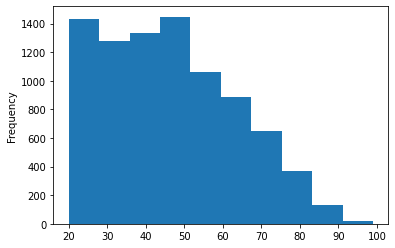

In [23]:
hist_plot = df['EDAD'].plot(kind = 'hist') 

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


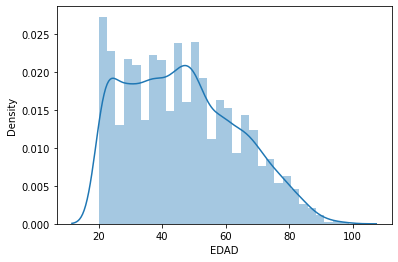

In [24]:
sns.distplot(df.EDAD)


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot of Age')

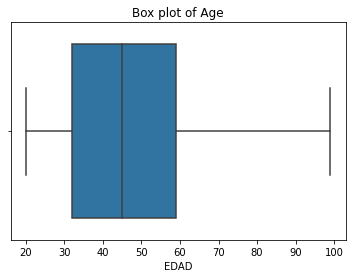

In [25]:
sns.boxplot(df['EDAD'],
           whis = (0,100)
           ).set_title('Box plot of Age')



### Los encuestados tienen rangos de edades entre **20 y 100 años**, el **75%** de los encuestados está entre los **30 y los 60 años** 

In [26]:
df['GENERO'] = df['GENERO'].astype('object')

In [27]:
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID          int64
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH     object
INCREMENTOV    object
GRUPOE         object
dtype: object

In [28]:
df['VCOVID'] = df['VCOVID'].astype('object')
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID         object
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH     object
INCREMENTOV    object
GRUPOE         object
dtype: object

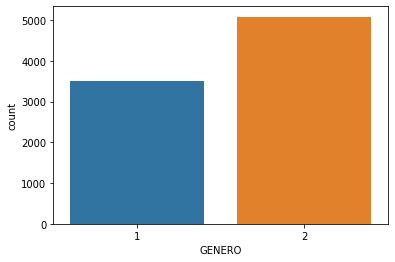

In [29]:
plt = sns.countplot(x = 'GENERO',
              data =df
             )


### Se observa que el **sexo 2** es el que más contesto en la encuesta 

# ¿Hay algun grupo de Edad que muestre mayor aceptación a la futura vacuna del covid 19?

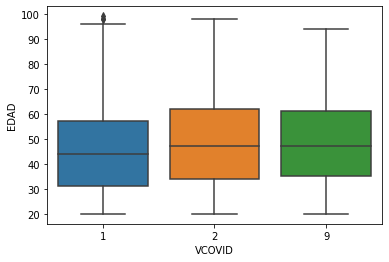

In [30]:
sns.boxplot(x = df['VCOVID'], 
            y = df['EDAD'])


In [31]:
import matplotlib.pyplot as plt

### * En ese grafico podemos ver que la mediana de edad de quienes no se pondrian la vacuna del covid y los que no saben si lo harian es practicamente igual. 



<function matplotlib.pyplot.show(*args, **kw)>

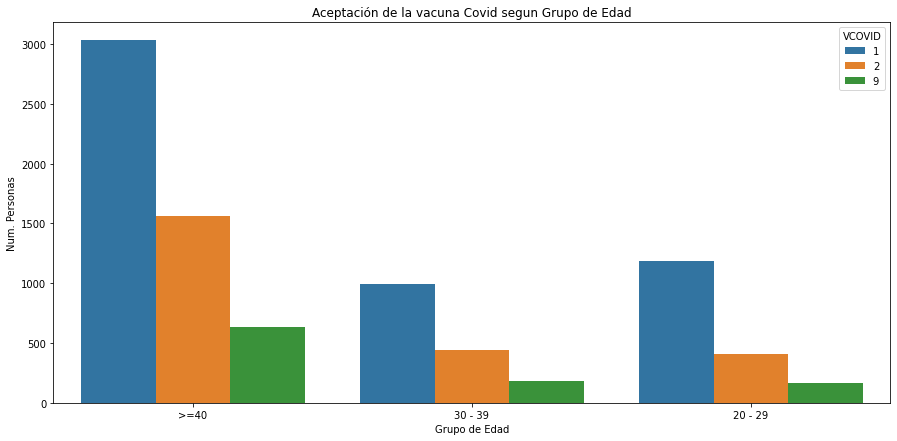

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='GRUPOE', hue='VCOVID',)
plt.title('Aceptación de la vacuna Covid segun Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Num. Personas')
plt.show

### * Pareciera que en el el grupo de 20-29 años la proporcion de aceptación de vacunas es mayor que en el grupo de 30-39

### Aceptacion de la vacuna según Genero

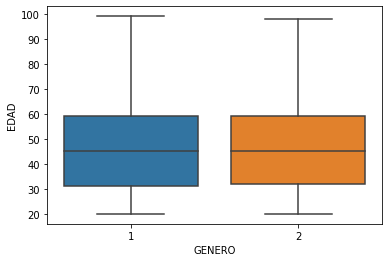

In [33]:
sns.boxplot(x = df['GENERO'], 
            y = df['EDAD'])

### * La proporcion en edades se mantiene para los dos sexos, por lo que las respuetas por grupo de edad siguen siendo proporcionales

<function matplotlib.pyplot.show(*args, **kw)>

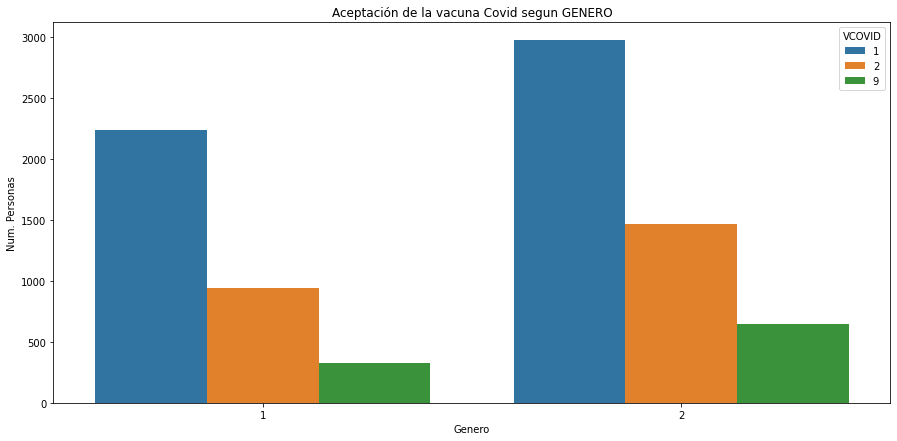

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='GENERO', hue='VCOVID',)
plt.title('Aceptación de la vacuna Covid segun GENERO')
plt.xlabel('Genero')
plt.ylabel('Num. Personas')
plt.show

## ¿El genero femenino tiene una mayor aceptación? o se mantiene? 

In [35]:
avBi2 = pd.pivot_table(df,
                      index = ['VCOVID'],
                      values = ['GRUPOE'],
                      columns =['GENERO'],
                     aggfunc = 'count' 
                     )
avBi2

GRUPOE      
GENERO      1     2
VCOVID             
1        2238  2974
2         945  1467
9         328   643

## Limitaciones: tengo problemas detectando que tipo de datos pueden ser usados para los tipos de operaciones, por ejemplo ¿que hay que hacer para trabajar con los datos de una tabla pivote? ¿que condiciones se requieren cumplir para los distintos tipos de información que estamos analizando? 

## Siguientes pasos analizar las proporciones de aceptación a la vacuna de covid vs géneros y rangos de edad, analizar por entidad si hay alguna donde se muestre una tendencia mayor a la aceptación o rechazo de la vacuna, y como se relaciona la aceptación de la vacuna con los pensamientos suicidas. 